In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("surat_uncleaned.csv")
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac
...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,"Check out Millionaires Lifestyle in Vesu, one ...",NaN,Call for Price
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,Superia is a premium residential project launc...,NaN,Call for Price
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,"When it comes to beautiful homes, nothing beat...",NaN,Call for Price
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,"DRB Ravani Cellestial Dreams in Vesu, Surat is...",NaN,Call for Price


In [3]:
#df.dropna(inplace=False)
# df

In [4]:
print(df.columns)

Index(['property_name', 'areaWithType', 'square_feet', 'transaction', 'status',
       'floor', 'furnishing', 'facing', 'description', 'price_per_sqft',
       'price'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   property_name   4525 non-null   object
 1   areaWithType    4525 non-null   object
 2   square_feet     4525 non-null   object
 3   transaction     4421 non-null   object
 4   status          4524 non-null   object
 5   floor           4480 non-null   object
 6   furnishing      4185 non-null   object
 7   facing          3936 non-null   object
 8   description     3154 non-null   object
 9   price_per_sqft  4157 non-null   object
 10  price           4525 non-null   object
dtypes: object(11)
memory usage: 389.0+ KB


In [6]:
df.describe()

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
count,4525,4525,4525,4421,4524,4480,4185,3936,3154,4157,4525
unique,1992,6,1399,38,138,222,78,176,2588,2134,841
top,3 BHK Apartment for Sale in Vesu Surat,Super Area,1000 sqft,Resale,Ready to Move,Resale,Unfurnished,East,Multistorey apartment is available for sale. I...,"₹5,000 per sqft",Call for Price
freq,93,2599,77,2197,3078,431,2322,1487,35,64,173


In [7]:
print(df.isnull().sum())

property_name        0
areaWithType         0
square_feet          0
transaction        104
status               1
floor               45
furnishing         340
facing             589
description       1371
price_per_sqft     368
price                0
dtype: int64


In [8]:
df = df.apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x))


In [9]:
df.dropna(thresh=len(df.columns) - 2, inplace=True)

In [10]:
df['square_feet'] = df['square_feet'].str.replace(' sqft', '', regex=False).str.replace(',', '')
df['square_feet'] = pd.to_numeric(df['square_feet'], errors='coerce')


In [11]:
df['price'] = df['price'].str.replace('₹', '', regex=False).str.replace(' Lac', '', regex=False).str.replace(',', '')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [12]:
df['price_per_sqft'] = df['price_per_sqft'].str.extract(r'(\d[\d,]*)').replace(',', '', regex=True)
df['price_per_sqft'] = pd.to_numeric(df['price_per_sqft'], errors='coerce')


In [13]:
df[['floor_num', 'total_floors']] = df['floor'].str.extract(r'(\d+).*?(\d+)', expand=True)
df['floor_num'] = pd.to_numeric(df['floor_num'], errors='coerce')
df['total_floors'] = pd.to_numeric(df['total_floors'], errors='coerce')

In [14]:
df.fillna({
    'floor_num': 0,
    'total_floors': df['total_floors'].median(),
    'price': df['price'].median(),
    'square_feet': df['square_feet'].median(),
}, inplace=True)

In [15]:
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price,floor_num,total_floors
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644.0,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...",2891.0,33.8,5.0,10.0
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278.0,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,3551.0,45.4,6.0,14.0
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173.0,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,3800.0,44.6,5.0,13.0
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700.0,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,3966.0,47.0,6.0,14.0
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250.0,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...",3600.0,45.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000.0,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,"Check out Millionaires Lifestyle in Vesu, one ...",NaN,51.0,5.0,12.0
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600.0,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,Superia is a premium residential project launc...,NaN,51.0,5.0,16.0
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250.0,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,"When it comes to beautiful homes, nothing beat...",NaN,51.0,7.0,13.0
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450.0,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,"DRB Ravani Cellestial Dreams in Vesu, Surat is...",NaN,51.0,7.0,18.0


In [24]:
numeric_features = ['square_feet', 'price_per_sqft', 'floor_num', 
                    'total_floors']


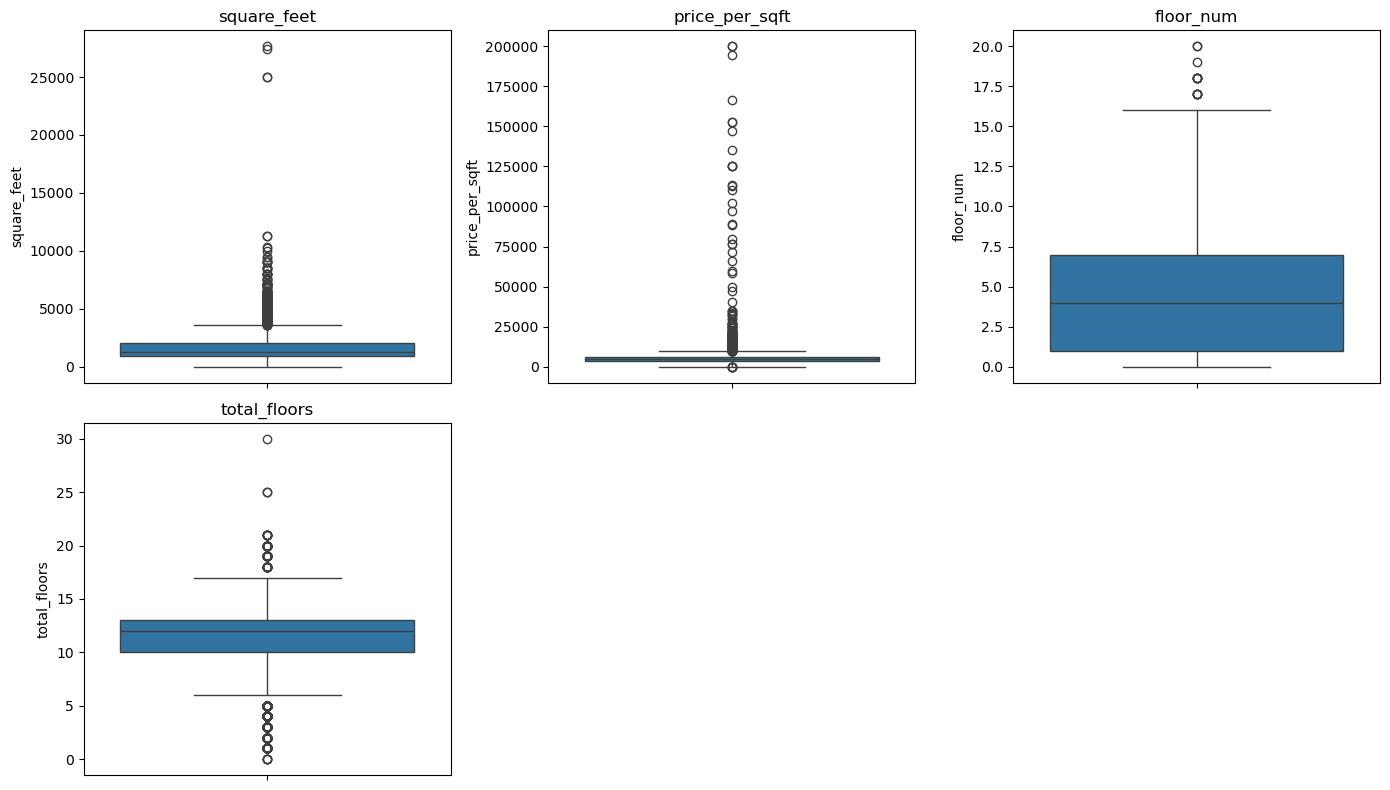

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()  


In [37]:
numeric_features = ['square_feet', 'price_per_sqft', 'floor_num', 
                    'total_floors']

import numpy as np

# Create a boolean mask for all outliers
outlier_mask = np.full(df.shape[0], False)


for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_mask |= (df[col] < lower) | (df[col] > upper)


print(f"Original rows: {df.shape[0]}")
print(f"Outlier rows: {outlier_mask.sum()}")
print(f"Remaining rows: {(~outlier_mask).sum()}")

df_cleaned = df[~outlier_mask].copy()


Original rows: 4266
Outlier rows: 1404
Remaining rows: 2862


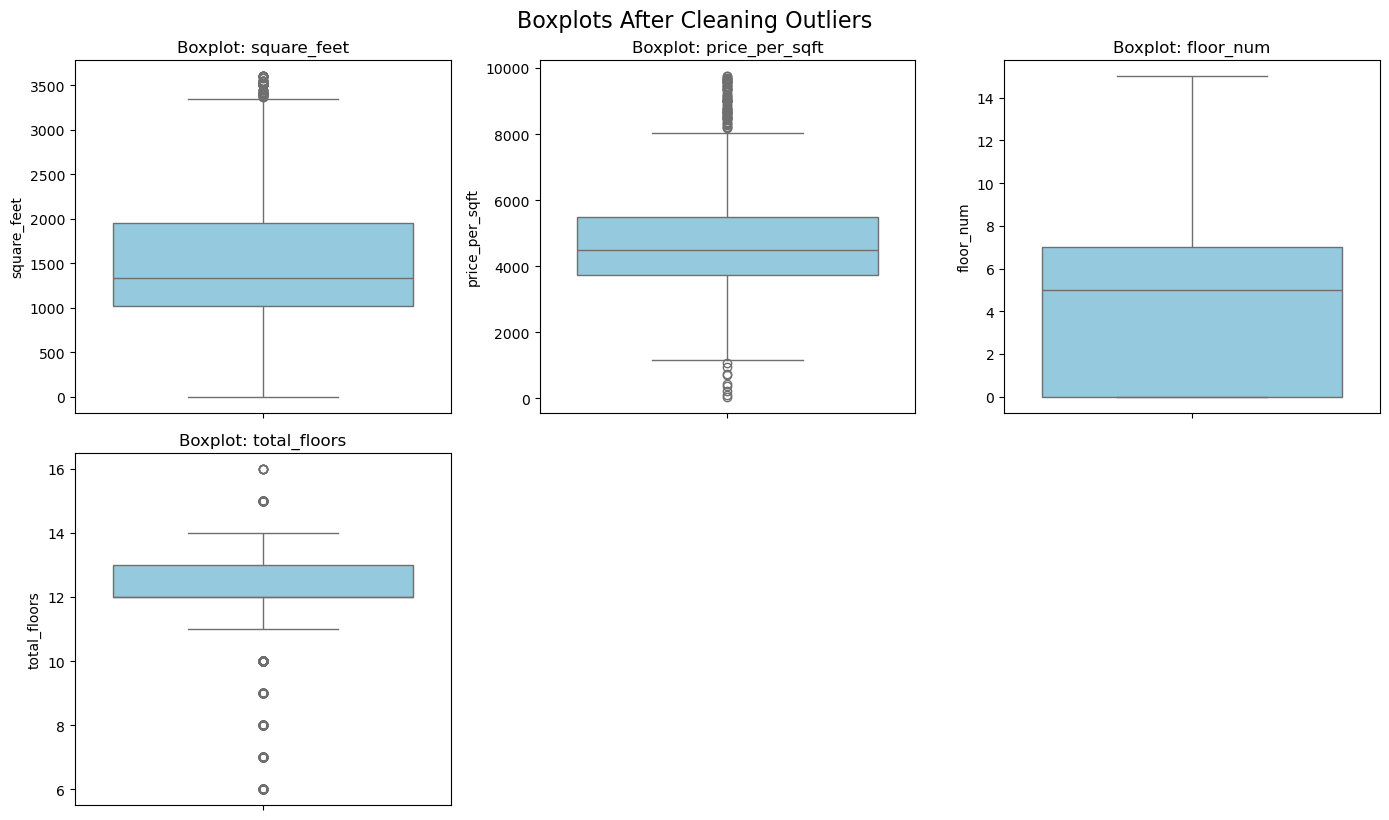

In [28]:

numeric_features = ['square_feet', 'price_per_sqft', 'floor_num', 
                    'total_floors']


plt.figure(figsize=(14, 8))

# Loop through each feature and plot
for i, col in enumerate(numeric_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_cleaned[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()

plt.suptitle("Boxplots After Cleaning Outliers", fontsize=16, y=1.02)
plt.show()


## Feature Engineering 

In [29]:

# Add price per sqft calculated :
df['calc_price_per_sqft'] = (df['price'] * 100000) / df['square_feet']

# floor ratio (floor_num / total_floors)
df['floor_ratio'] = df['floor_num'] / df['total_floors']

#  new property (1 if 'New Property', else 0)
df['is_new'] = df['transaction'].apply(lambda x: 1 if 'New Property' in str(x) else 0)


## Final review:

In [30]:
print(df.head())


                                       property_name areaWithType  \
0          2 BHK Apartment for Sale in Dindoli Surat  Carpet Area   
1           2 BHK Apartment for Sale in Althan Surat   Super Area   
2          2 BHK Apartment for Sale in Pal Gam Surat   Super Area   
3     2 BHK Apartment for Sale in Jahangirabad Surat  Carpet Area   
4  2 BHK Apartment for Sale in Orchid Fantasia, P...   Super Area   

   square_feet      transaction            status        floor  \
0        644.0     New Property  Poss. by Oct '24  5 out of 10   
1       1278.0     New Property  Poss. by Jan '26  6 out of 14   
2       1173.0           Resale     Ready to Move  5 out of 13   
3        700.0     New Property     Ready to Move  6 out of 14   
4       1250.0  Orchid Fantasia      New Property  Unfurnished   

       furnishing       facing  \
0     Unfurnished         West   
1     Unfurnished  South -West   
2  Semi-Furnished         East   
3     Unfurnished         East   
4               2 

In [31]:
print(df.describe())


        square_feet  price_per_sqft        price    floor_num  total_floors  \
count   4266.000000     3930.000000  4266.000000  4266.000000   4266.000000   
mean    1702.678622     6287.301272    51.773840     4.102907     10.782700   
std     1468.239372    10145.887459    18.300909     3.588369      3.817144   
min        1.000000        1.000000     1.000000     0.000000      0.000000   
25%      918.500000     3684.000000    45.000000     1.000000     10.000000   
50%     1300.000000     4689.500000    51.000000     4.000000     12.000000   
75%     2000.000000     6111.000000    58.000000     7.000000     13.000000   
max    27646.000000   200000.000000   100.000000    20.000000     30.000000   

       calc_price_per_sqft  floor_ratio       is_new  
count         4.266000e+03  4266.000000  4266.000000  
mean          6.297459e+03          inf     0.347867  
std           7.960627e+04          NaN     0.476349  
min           2.000000e+01     0.000000     0.000000  
25%          

In [32]:
print(df.isnull().sum())

property_name             0
areaWithType              0
square_feet               0
transaction               0
status                    0
floor                     0
furnishing               98
facing                  330
description            1168
price_per_sqft          336
price                     0
floor_num                 0
total_floors              0
calc_price_per_sqft       0
floor_ratio               0
is_new                    0
dtype: int64


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


features = ['square_feet', 'price_per_sqft', 'floor_num', 'total_floors',
            'calc_price_per_sqft', 'floor_ratio', 'is_new',
            'furnishing', 'facing', 'areaWithType', 'transaction', 'status']

X = df[features]
y = df['price']


X = pd.get_dummies(X, columns=['furnishing', 'facing', 'areaWithType', 'transaction', 'status'], drop_first=True)


X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median())
y = y.fillna(y.median())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Random Forest Regression Results ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")



--- Random Forest Regression Results ---
Mean Squared Error (MSE): 14.34
R-squared (R2 Score): 0.96


### MSE = 14.34: This is the average squared difference between predicted and actual prices . This is a reasonable error, depending on your price range.

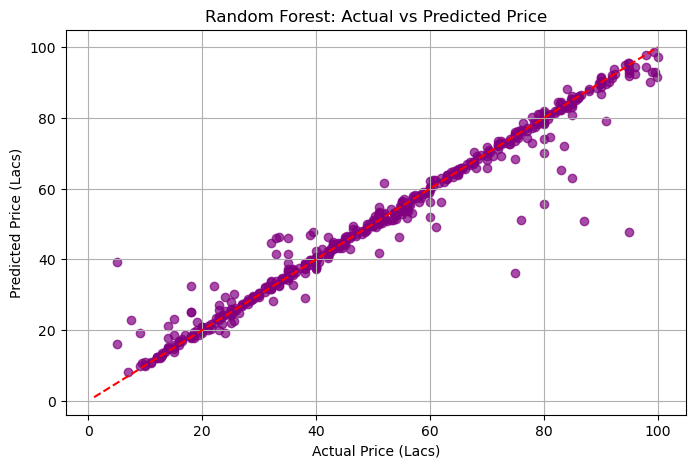

In [34]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price (Lacs)")
plt.ylabel("Predicted Price (Lacs)")
plt.title("Random Forest: Actual vs Predicted Price")
plt.grid(True)
plt.show()

## From the plot we can see that :

### Diagonal reference line.

### It represents perfect predictions ( predicted = actual).

### The closer a dot is to this red dashed line, the better the prediction.

## Plot feature importances from the trained Random Forest model:
#### from the plot we can see that the predicted price of a property is influence the most (square_feet high → means area is a strong price factor..)

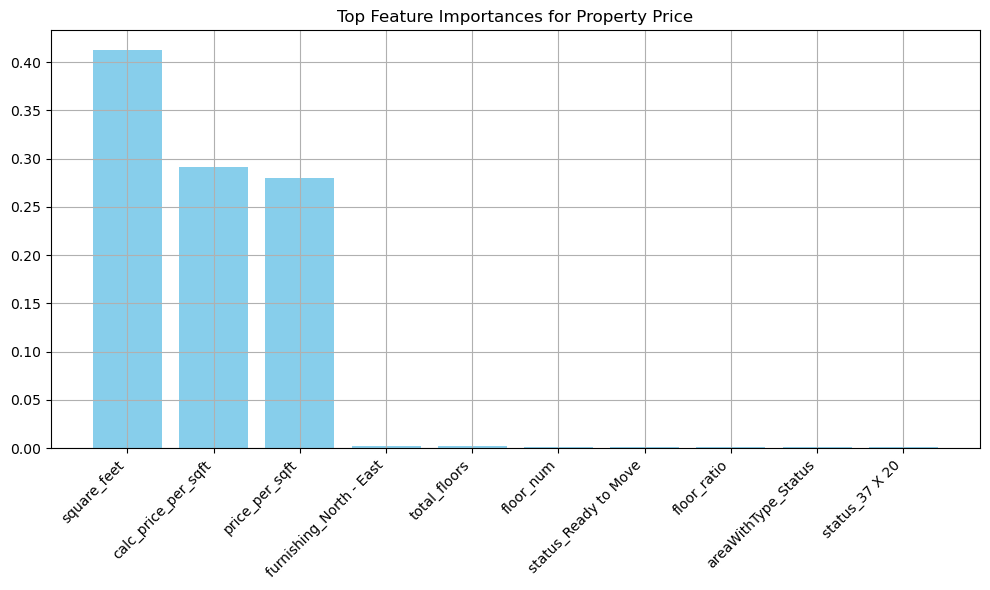

In [35]:

importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances for Property Price")
plt.bar(range(10), importances[indices[:10]], align="center", color='skyblue')
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


In [36]:
df.shape

(4266, 16)